<div class="alert alert-block alert-info">

# Part 1: Activity

</div>

### Question 1: Read the content of the `Reviews.csv` into a dataframe called `reviews_df` and perform the following:
<hr style="border:1px solid orange"> </hr>

> **Q1.1.** Preprocess the `text` field content by performing the necessary steps to make it ready for applying sentiment analysis. Append the resulted preprocessed text to the `reviews_df` as a new column called `preprocessed_review`.

> **Q1.2.** Using nltk's `SentimentIntensityAnalyzer` module, get the `neg`, `neu`, `pos`, and `compound` scores of the `preprocessed_review` field and append the result to the `reviews_df` as new 4 columns-`neg`, `neu`, `pos`, and `compound`, respectively.


> **Q1.3.** Label each review in the `reviews_df` as either `pos` or `neg` based on the `compound` value for that specific review, and append the result to the dataframe as new column called `comp_score`. If the value of `compound` is greater than or equals to `zero`, then the `comp_score = 'pos'` and `'neg'` otherwise.

***After performing the first 3 parts, your dataframe should look like the following:***

|Id|neg|neu|pos|compound|comp_score|ProductId|ProfileName|Score|Summary|Text|preprocessed_review
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|1|0.000|0.695|0.305|0.9441|pos|A3SGXH7AUHU8GW|delmartian|5|Good Quality Dog Food|I have bought several of the Vitality canned d...|I have bought several of the Vitality canned d...|
|2|0.079|0.853|0.068|-0.1027|neg|A1D87F6ZCVE5NK|dll pa|1|Not as Advertised|Product arrived labeled as Jumbo Salted Peanut...|Product arrived labeled as Jumbo Salted Peanut...|
|3|0.091|0.754|0.155|0.8265|pos|ABXLMWJIXXAIN|Natalia Corres "Natalia Corres"|4|"Delight" says it all|This is a confection that has been around a fe...|This is a confection that has been around a fe...|

> **Q1.4.** Using seaborn's `barplot`, plot the actual score of the review (The Score column of the dataframe) against the pos, neu, neg, and compound values. You should generate 4 plots for the for values against the actual score. The documentation for the seaborn barplot module can be found here  &rarr; [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)


> **Q1.5.** Based on the plots generated in `Q1.4`, discuss the results of the analysis.

In [77]:
import string
import gzip
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib. cm as cm

import nltk
from nltk. sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import watermark
%matplotlib inline
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [139]:
reviews_df = pd.read_csv("Reviews.csv")

### 500 rows was used because of the power of my laptop.

In [142]:
reviews_df = reviews_df.head(500)

In [144]:
reviews_df.shape

(500, 10)

In [146]:
reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
496,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."
497,500,B000G6RYNE,A83YQC1XOU4CS,J. Baker,0,0,5,1183420800,The best I've had,I don't write very many reviews but I have to ...
498,501,B000G6RYNE,A2LGWBIT9WCTVA,D. Gesswein,0,0,5,1173312000,Excellent chip!,I bought these for the office and no one can p...


In [12]:
# Q1.1.


Preprocessing

In [148]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JEGEDETB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JEGEDETB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [150]:
lemmatizer = WordNetLemmatizer()
## stop_words = set(stopwords.words('english'))

In [152]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    words = word_tokenize(text)

   ## words = [word for word in words if word not in stop_words]

    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [154]:
reviews_df['preprocessed_review'] = reviews_df['Text'].apply(preprocess_text)

In [155]:
print(reviews_df[['Text', 'preprocessed_review']])

                                                  Text  \
0    I have bought several of the Vitality canned d...   
1    Product arrived labeled as Jumbo Salted Peanut...   
2    This is a confection that has been around a fe...   
3    If you are looking for the secret ingredient i...   
4    Great taffy at a great price.  There was a wid...   
..                                                 ...   
495  Kettle Chips Spicy Thai potato chips have the ...   
496  Okay, I should not eat potato chips, nor shoul...   
497  I don't write very many reviews but I have to ...   
498  I bought these for the office and no one can p...   
499  It was a great value and I like the package si...   

                                   preprocessed_review  
0    i have bought several of the vitality canned d...  
1    product arrived labeled a jumbo salted peanuts...  
2    this is a confection that ha been around a few...  
3    if you are looking for the secret ingredient i...  
4    great taffy a

In [158]:
reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled a jumbo salted peanuts...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that ha been around a few...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there wa a wide a...
...,...,...,...,...,...,...,...,...,...,...,...
495,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,kettle chip spicy thai potato chip have the pe...
496,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",okay i should not eat potato chip nor should a...
497,500,B000G6RYNE,A83YQC1XOU4CS,J. Baker,0,0,5,1183420800,The best I've had,I don't write very many reviews but I have to ...,i dont write very many review but i have to sa...
498,501,B000G6RYNE,A2LGWBIT9WCTVA,D. Gesswein,0,0,5,1173312000,Excellent chip!,I bought these for the office and no one can p...,i bought these for the office and no one can p...


In [160]:
# Q1.2.

In [162]:
## nltk.download('vader_lexicon')

In [164]:
sia = SentimentIntensityAnalyzer()

In [166]:
# Apply polarity_scores to each review individually and store the results in a new column
reviews_df['sentiment_scores'] = reviews_df['preprocessed_review'].apply(sia.polarity_scores)

# Access the sentiment scores for the first review
reviews_df['sentiment_scores'].head()

0    {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...
1    {'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...
2    {'neg': 0.069, 'neu': 0.751, 'pos': 0.18, 'com...
3    {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...
4    {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...
Name: sentiment_scores, dtype: object

In [168]:
# Run the polarity score on the entire dataset
res = {}
for i, row in reviews_df.iterrows():
    preprocessed_review = row['preprocessed_review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(preprocessed_review)

In [170]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(reviews_df, how='left')

In [172]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review,sentiment_scores
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp..."
1,2,0.147,0.853,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled a jumbo salted peanuts...,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp..."
2,3,0.069,0.751,0.180,0.9079,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that ha been around a few...,"{'neg': 0.069, 'neu': 0.751, 'pos': 0.18, 'com..."
3,4,0.000,0.925,0.075,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp..."
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there wa a wide a...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp..."


In [174]:
# Q1.3.

In [176]:
# Function to label the review based on compound score
def label_compound(compound):
    return 'pos' if compound >= 0 else 'neg'

In [178]:
# Apply the function to the compound column and create the comp_score column
vaders['comp_score'] = vaders['compound'].apply(label_compound)

In [180]:
# Move the comp_score column to be right after the compound column
compound_idx = vaders.columns.get_loc('compound') 
vaders.insert(compound_idx + 1, 'comp_score', vaders.pop('comp_score'))  # Insert comp_score after compound

In [182]:
vaders.head()

,Id,neg,neu,pos,compound,comp_score,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review,sentiment_scores
0,1,0.000,0.695,0.305,0.9441,pos,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp..."
1,2,0.147,0.853,0.000,-0.5664,neg,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled a jumbo salted peanuts...,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp..."
2,3,0.069,0.751,0.180,0.9079,pos,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that ha been around a few...,"{'neg': 0.069, 'neu': 0.751, 'pos': 0.18, 'com..."
3,4,0.000,0.925,0.075,0.4404,pos,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp..."
4,5,0.000,0.552,0.448,0.9468,pos,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there wa a wide a...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp..."


# Q1.4.

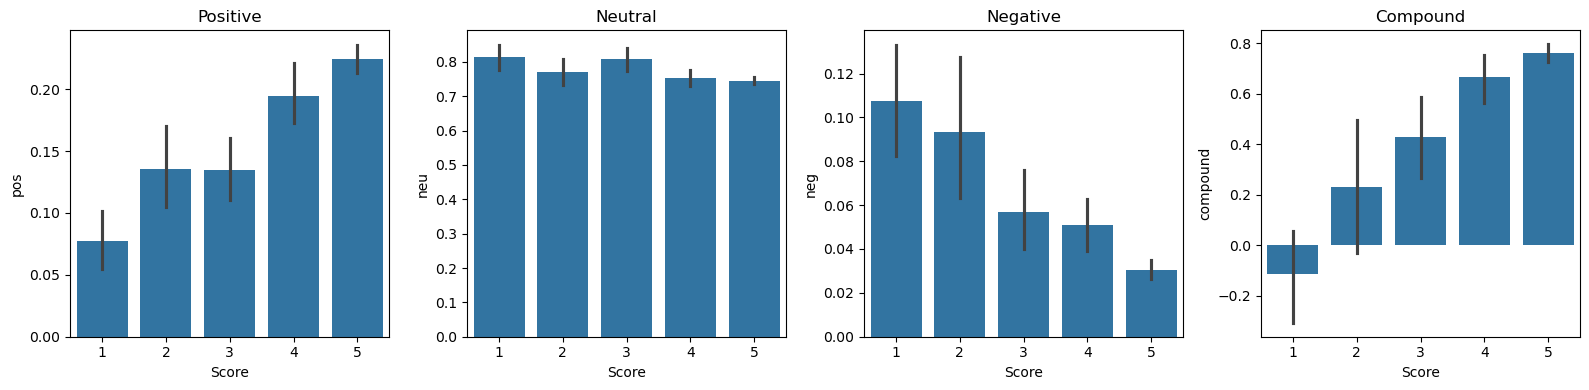

In [186]:
import seaborn as sns
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
sns.barplot(data=vaders, x='Score', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')

plt.tight_layout()
plt.show()

##### Q1.5.

#### 1. Positive Sentiment vs. Score:
Since it is positive, it is as expected that reviews with higher scores (4 and 5) show increased positive sentiment (`pos` values), while lower-rated reviews (1 and 2) have minimal positive sentiment. This indicates that higher ratings reflect more positive language.
 
#### 2. Neutral Sentiment vs. Score:
The Neutral sentiment is relatively consistent across the scores, especially high in reviews with a score of 1, 2, and 3. This suggests that even some low-rated reviews contain neutral or objective language, possibly indicating dissatisfaction without clear negativity.

#### 3. Negative Sentiment vs. Score:
The negative sentiment is prominent in reviews with a score of 1, aligning with expectations that the lowest-rated reviews are more negative. We can see that as the score increases, negative sentiment sharply decreases, with higher-rated reviews showing very little negativity. 

#### 4. Compound Sentiment vs. Score:
The compound score increases steadily with higher review scores, which reflects the overall sentiment. Reviews with a score of 1 have a negative compound value, while those rated 4 and 5 have significantly higher, positive compound scores. This really buttresses the effectiveness of the compound score in summarizing overall sentiment.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity.
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells.

### 1. Reflection on performing this activity:
Performing this activity was insightful and practical. The process involved several important steps like text preprocessing for sentiment analysis, using `VADER` to extract sentiment scores, and visualizing results with `seaborn`. For each question i answered, it reinforced the importance of data cleaning and the application of natural language processing (NLP) techniques. Additionally, analyzing sentiment scores against actual review ratings provided meaningful insight into customer feedback and product perception

### 2.  Importance of Learning this activity:
This lab highlighted the critical role of sentiment analysis in understanding unstructured text data. Learning to preprocess text, apply sentiment scoring, and visualize the results empowers data analysts to extract valuable insights from large datasets, which is essential in various fields like marketing, customer service, and product development..

Submit **Lab5.ipynb** to the **Lab 5 – Sentiment Analysis (Dropbox)** on D2L by the due date.